## NC Water Budget Explorer - Simple
Using NC Water Withdrawal/Discharge/Transfer data [(link)](https://www.ncwater.org/Permits_and_Registration/Water_Withdrawal_and_Transfer_Registration/), this notebook explores water budgets at the watershed scale with the underlying objectives of revealing what we can show with this data and identify data gaps that would prove helpful. 

A map of the subbasins is found here: http://www.ncwater.org/Permits_and_Registration/Water_Withdrawal_and_Transfer_Registration/docs/river_basin_map.pdf

In [1]:
#Imports
import os
import pandas as pd
%matplotlib inline

In [2]:
#Get data
dataFolder='..\\..\\Data\\NCDEQ'
volumeFN = os.path.join(dataFolder,'MonthlyVolumeData.csv')
dfVol = pd.read_csv(volumeFN)
print(" {} records loaded".format(len(dfVol)))

 110208 records loaded


In [3]:
#Add MGD columns for withdrawal, discharge, and transfer
dfVol['withdrawal_MGD'] = dfVol['# of DaysUsed'] * dfVol['Average DailyWithdrawal (MGD)']
dfVol['discharge_MGD'] = dfVol['# of DaysDischarged'] * dfVol['Average DailyDischarge (MGD)']
dfVol['transfer_MGD'] = dfVol['# of DaysTransferred'] * dfVol['Average DailyTransfer (MGD)']

In [4]:
#Select data for a specific year (2017) and subbasin ('Neuse River (10-1)')
year = 2017
subbasin = 'Neuse River (10-1)'

yearMask = dfVol['Year'] == year
subbasinMask = dfVol['Subbasin'] == subbasin
dfSubset = dfVol[yearMask & subbasinMask]
print(" {} records selected".format(len(dfSubset)))

 3096 records selected


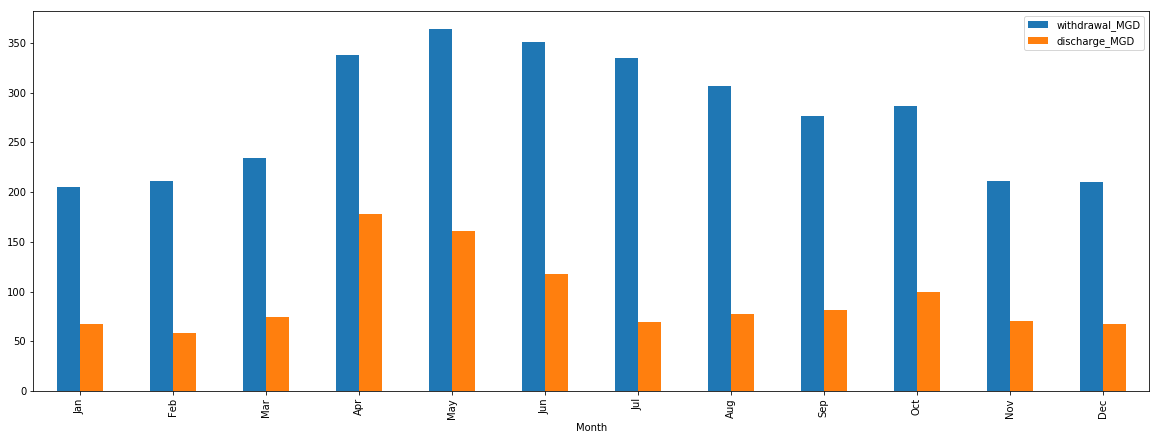

In [5]:
#Compute summaries by month
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
dfPlot = dfSubset.groupby('Month')[['withdrawal_MGD','discharge_MGD']].sum()
dfPlot.index = pd.CategoricalIndex(dfPlot.index,categories=months,sorted=True)
dfPlot.sort_index(inplace=True)
#Plot
dfPlot.plot(kind='bar',figsize=(20,7));